In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.cm as cm
import matplotlib.colors as col

1


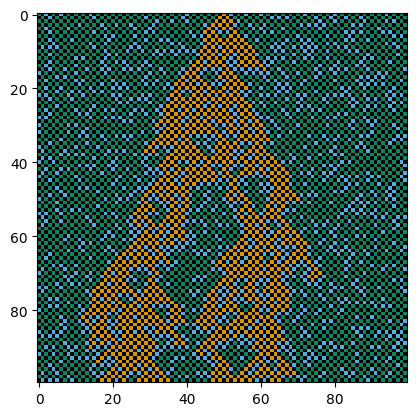

In [22]:
n = 100
p = 0.7
matrix = np.zeros((n, n))
matrix2 = np.random.rand(n,n)
for i in range(n):
    for j in range(n):
        if matrix2[i,j] < p:
            matrix2[i,j] = 0.66
        else:
            matrix2[i,j] = 0.33
for i in range(n):
    for j in range(n):
        if i%2 == 0:
            if j%2 == 0:
                matrix[i,j] = matrix2[i,j]
        else:
            if j%2 == 1:
                matrix[i,j] = matrix2[i,j]
if matrix[0, int(n/2)] == 0.66:
    matrix[0, int(n/2)] = 1
    for i in range(n-1):
        for j in range(n):
            if 0 < j < n-1:
                if matrix[i,j] == 1:
                    if matrix[i+1, j-1] == 0.66:
                        matrix[i+1, j-1] = 1
                    if matrix[i+1, j+1] == 0.66:
                        matrix[i+1, j+1] = 1
            if j == n-1:
                if matrix[i,j] == 1:
                    if matrix[i+1, j-1] == 0.66:
                        matrix[i+1, j-1] = 1
            if j == 0:
                if matrix[i,j] == 1:
                    if matrix[i+1, j+1] == 0.66:
                        matrix[i+1, j+1] = 1
cmap2 = col.ListedColormap(['#000000', '#52AFE2', '#098663', '#D69605'])
plt.imshow(matrix, cmap = cmap2)
x = 0
for i in range(n):
    if matrix[n-1, i] == 1:
        x = 1
        break
print(x)

In [23]:
length = []
if matrix[0, int(n/2)] == 1:
    for j in range(n):
        position = []
        for i in range(n):
            if matrix[i,j] == 1:
                position = position + [i]
        if len(position) > 0:
            length = length + [(position[-1]-position[0]+1)/2]
    #find correlation length
    cor = max(length)
else:
    cor = 0
print(cor)

49.5


In [38]:
n = 3000
p = [0.69, 0.691, 0.692, 0.693, 0.694, 0.695, 0.696, 0.697, 0.698, 0.699, 0.7]
xi = []
for l in range(11):
    corlist = []
    for k in range(30):
        matrix = np.zeros((n, n))
        matrix2 = np.random.rand(n,n)
        for i in range(n):
            for j in range(n):
                if matrix2[i,j] < p[l]:
                    matrix2[i,j] = 0.66
                else:
                    matrix2[i,j] = 0.33
        for i in range(n):
            for j in range(n):
                if i%2 == 0:
                    if j%2 == 0:
                        matrix[i,j] = matrix2[i,j]
                else:
                    if j%2 == 1:
                        matrix[i,j] = matrix2[i,j]
        if matrix[0, int(n/2)] == 0.66:
            matrix[0, int(n/2)] = 1
            for i in range(n-1):
                for j in range(n):
                    if 0 < j < n-1:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j-1] == 0.66:
                                matrix[i+1, j-1] = 1
                            if matrix[i+1, j+1] == 0.66:
                                matrix[i+1, j+1] = 1
                    if j == n-1:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j-1] == 0.66:
                                matrix[i+1, j-1] = 1
                    if j == 0:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j+1] == 0.66:
                                matrix[i+1, j+1] = 1
        #going across all columns
        length = []
        if matrix[0, int(n/2)] == 1:
            for j in range(n):
                position = []
                #going across all rows
                for i in range(n):
                    #taking the column position of clustering sites
                    if matrix[i,j] == 1:
                        position = position + [i]
                if len(position) > 0:
                    length = length + [(position[-1]-position[0]+1)/2]
            #find correlation length
            cor = max(length)
            corlist = corlist + [cor]
        else:
            cor = 0
            corlist = corlist + [cor]
    y = sum(corlist)/len(corlist)
    xi = xi + [y]
print(xi)

[151.23333333333332, 60.28333333333333, 44.5, 106.88333333333334, 42.96666666666667, 56.516666666666666, 84.38333333333334, 63.13333333333333, 150.36666666666667, 316.85, 193.56666666666666]


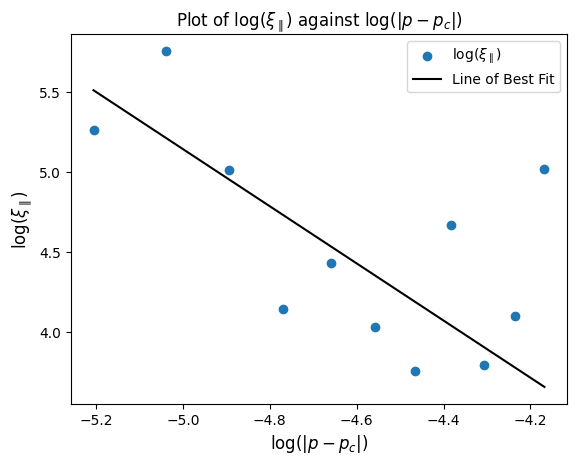

In [41]:
p_minus_pc = abs(np.array(p)-0.705485)
plt.scatter(np.log(abs(np.array(p)-0.705485)), np.log(xi))
coeffs = np.polyfit(np.log(p_minus_pc[1:-1]), np.log(xi)[1:-1], 1)
poly = coeffs[1] + coeffs[0]*(np.log(p_minus_pc))
plt.plot(np.log(p_minus_pc), poly, c='k')
plt.xlabel('$\\log(|p-p_c|)$', fontsize = 'large')
plt.ylabel('$\\log(\\xi_{\\parallel})$', fontsize = 'large')
plt.legend(['$\\log(\\xi_{\\parallel})$', 'Line of Best Fit'])
plt.title('Plot of $\\log(\\xi_{\\parallel})$ against $\\log(|p-p_c|)$', fontsize = 'large')
plt.show()

In [42]:
grad = (poly[-1]-poly[0])/(np.log(p_minus_pc[-1])-np.log(p_minus_pc[0]))
nu = -grad
print(nu)

1.7861084363777293
